In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)         # 例: 2.8.0+cu129
print(torch.version.cuda)        # '12.9' と出るはず
print(torch.cuda.is_available()) # True なら成功！
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # GPU名が出る

print(torch.cuda.is_available())

2.5.1+cu121
12.1
True
NVIDIA GeForce GTX 1050 Ti
True


In [ ]:
print(torch.__version__)         # 例: 2.8.0+cu129
print(torch.version.cuda)        # '12.9' と出るはず
print(torch.cuda.is_available()) # True なら成功！
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # GPU名が出る

print(torch.cuda.is_available())

2.5.1+cu121
12.1
True
NVIDIA GeForce GTX 1050 Ti
True


In [3]:
# 1. デバイス、パス、およびハイパーパラメータの設定
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_dir = 'C:\\Users\\karas\\Documents\\etc\\python\\ViT\\flowers'  # 💡 データセットのパスを更新してください

BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10
NUM_CLASSES = 5

In [4]:
# 元のデータセットフォルダ
base_dir = "flowers"
# 出力先
output_dir = "dataset"
# 分割割合
#split_ratio = {"train": 0.8, "val": 0.1, "test": 0.1}

In [5]:
"""
# 出力フォルダの作成
for split in split_ratio.keys():
    split_path = os.path.join(output_dir, split)
    os.makedirs(split_path, exist_ok=True)

# 各クラスごとに処理
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    
    # クラスごとの出力先フォルダ作成
    for split in split_ratio.keys():
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)
    
    # 画像ファイル一覧を取得 & シャッフル
    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    random.shuffle(files)

    # 分割数を計算
    total = len(files)
    train_end = int(total * split_ratio["train"])
    val_end = train_end + int(total * split_ratio["val"])

    # 振り分け
    train_files = files[:train_end]
    val_files = files[train_end:val_end]
    test_files = files[val_end:]

    # コピー処理
    for f in train_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(output_dir, "train", class_name, f))
    for f in val_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(output_dir, "val", class_name, f))
    for f in test_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(output_dir, "test", class_name, f))

print("データ分割が完了しました")
"""

'\n# 出力フォルダの作成\nfor split in split_ratio.keys():\n    split_path = os.path.join(output_dir, split)\n    os.makedirs(split_path, exist_ok=True)\n\n# 各クラスごとに処理\nfor class_name in os.listdir(base_dir):\n    class_dir = os.path.join(base_dir, class_name)\n    if not os.path.isdir(class_dir):\n        continue\n\n    # クラスごとの出力先フォルダ作成\n    for split in split_ratio.keys():\n        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)\n\n    # 画像ファイル一覧を取得 & シャッフル\n    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]\n    random.shuffle(files)\n\n    # 分割数を計算\n    total = len(files)\n    train_end = int(total * split_ratio["train"])\n    val_end = train_end + int(total * split_ratio["val"])\n\n    # 振り分け\n    train_files = files[:train_end]\n    val_files = files[train_end:val_end]\n    test_files = files[val_end:]\n\n    # コピー処理\n    for f in train_files:\n        shutil.copy(os.path.join(class_dir, f), os.path.join(output_dir, "train

In [6]:
# 2. データ変換の定義
transform = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

In [7]:
weights = models.ViT_B_16_Weights.DEFAULT
transform = weights.transforms()

train_dataset = datasets.ImageFolder("dataset/train", transform=transform)
val_dataset   = datasets.ImageFolder("dataset/val", transform=transform)
test_dataset  = datasets.ImageFolder("dataset/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
num_classes = len(train_dataset.classes)  # クラス数（花の種類）

In [9]:
# ========================
# モデル定義（Vision Transformer）
# ========================
weights = models.ViT_B_16_Weights.DEFAULT
model = models.vit_b_16(weights=weights)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [11]:
# ========================
# 損失関数 & 最適化手法
# ========================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# 💡 学習率スケジューラを定義
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [12]:
# ========================
# 学習ループ
# ========================
num_epochs = 5
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

In [ ]:
for epoch in range(num_epochs):
    # ---- 学習フェーズ ----
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        pbar.set_postfix(loss=loss.item())

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

        # ---- 検証フェーズ ----
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]")
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            pbar.set_postfix(loss=loss.item())

    val_loss = running_loss / total
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    scheduler.step() # 💡 エポックの最後にスケジューラを更新

Epoch 1/5 [Train]:  28%|██▊       | 30/108 [10:21<2:02:18, 94.08s/it, loss=0.142]

In [ ]:
# 学習済みモデルを保存
torch.save(model.state_dict(), "model.pth")
torch.save(model, "model_full.pth")

In [ ]:
# ========================
# テストデータで評価
# ========================
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Accuracy: {correct / total:.4f}")

NameError: name 'model' is not defined

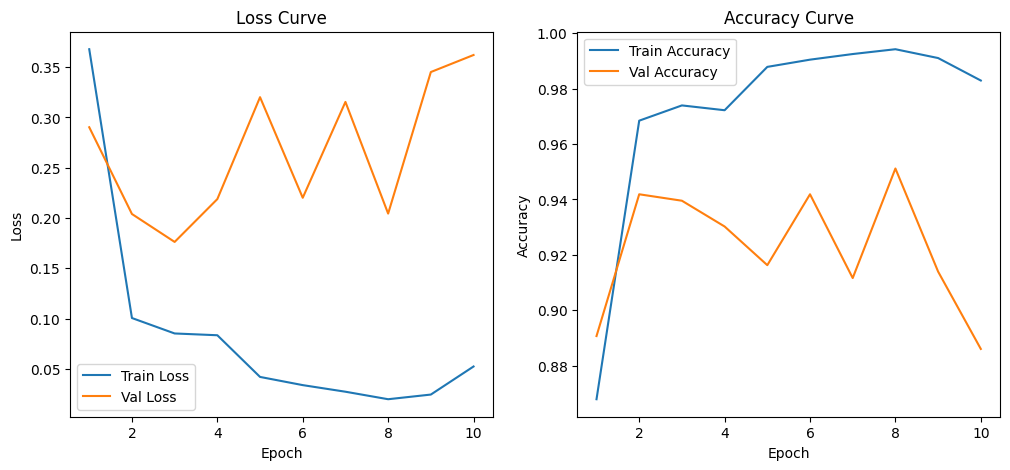

: 

In [ ]:
# ========================
# 学習過程の可視化
# ========================
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# 損失
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 精度
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()